In [1]:
!pip install nltk

In [2]:
!pip install wordcloud

In [3]:
import nltk

In [4]:
#nltk.download()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
cd C:\Users\Administrator\Desktop\mongodb\data for mongo

C:\Users\Administrator\Desktop\mongodb\data for mongo


In [7]:
reviews = pd.read_csv("K8 Reviews v0.2.csv")

In [8]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


This dataset is scrapped from amazon about Lenevo K8 mobile phones.While the users gave the reviews, they also give the ratings
- Ratings 1,2,3 -> negitive sentiment has a value 0 in the sentiment column
- Ratings 4,5 -> positive sentiment has a value 1 in the sentiment column

In [9]:
reviews.shape

(14675, 2)

In [10]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

Plot the word cloud and the bar graph for the reviews

In [11]:
from wordcloud import WordCloud

In [12]:
reviews_combined = " ".join(reviews.review.values)

In [13]:
str = ["hi","hello","how are you"]
" ".join(str)

'hi hello how are you'

In [14]:
reviews_combined[:100]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hel'

In [15]:
word_cloud = WordCloud().generate(reviews_combined)

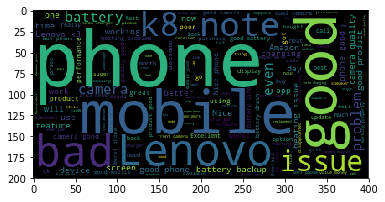

In [16]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

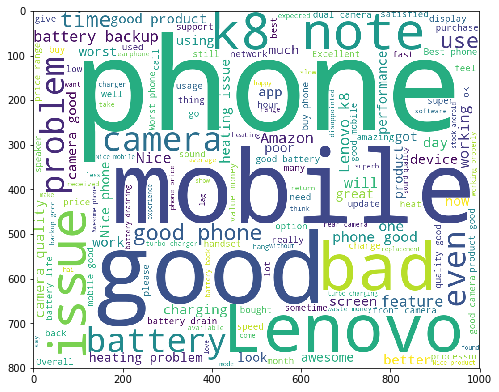

In [17]:
word_cloud = WordCloud(width=1000,height=800,background_color='white',
                       max_words=150).\
generate_from_text(reviews_combined)
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [18]:
?WordCloud

In [19]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [20]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

In [21]:
df_dist.sort_values(ascending=False,by="freq").head(25)

,words,freq
13,is,10151
94,the,5565
41,not,5162
4,and,5078
91,phone,4766
20,to,4627
75,this,3833
143,in,3445
28,I,3418
185,good,3348


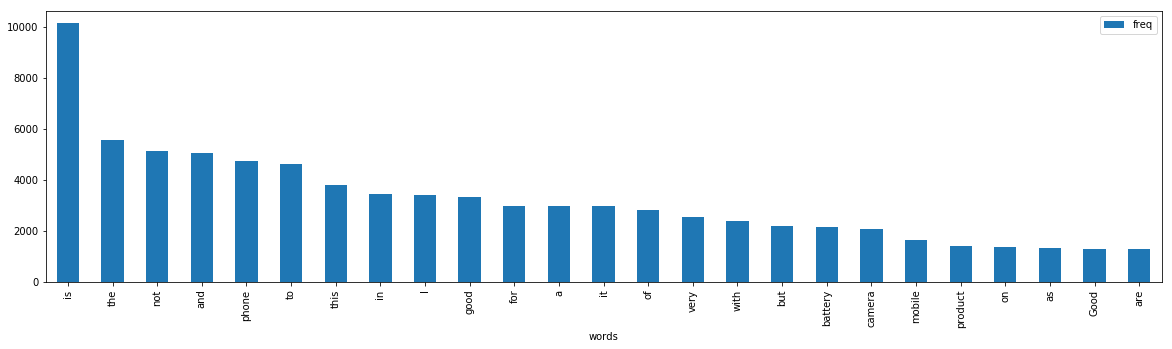

In [22]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

Problems with the above visuals:

    1.case is non uniform
    2. punctuations and stop words
    3. words with different tense forms like charged, charging, charges has its root form in charge

In [23]:
from nltk.tokenize import word_tokenize

In [24]:
all_terms = word_tokenize(reviews_combined.lower())

In [25]:
print(all_terms[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [26]:
from nltk.probability import FreqDist

In [27]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

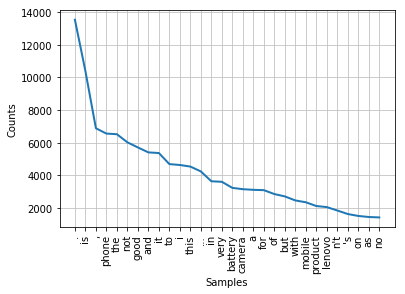

In [28]:
fdist.plot(30,cumulative=False)
plt.show()

The most commonly used and the least commonly used words in any language includes:
    1. language connectors called stop words
    2. punctuations

In [29]:
from string import punctuation
from nltk.corpus import stopwords

In [30]:
stop_nltk = stopwords.words("english")

In [31]:
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [32]:
stop_updated = stop_nltk + ["...","..","!!"] +["phone",
                                          "mobile","lenovo","k8",
                                               "note","amazon","n't"]

In [33]:
reviews_updated1 = [term for term in all_terms \
                    if term not in stop_updated \
and term not in list(punctuation) and len(term)>2]

In [34]:
print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [35]:
print(reviews_updated1)

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged.this', 'biggest', 'lie', 'lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000mah', 'booster', 'charger', 'fake', 'takes', 'least', 'hours', 'fully', 'charged.do', 'know', 'survive', 'making', 'full', 'us.please', 'else', 'regret', 'like', 'get', 'cash', 'back', 'already', 'january..', 'good', 'worst', 'everthey', 'changed', 'last', 'problem', 'still', 'returning', '.highly', 'disappointing', 'telling', 'buyi', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 'charging', 'heats', 'allot..really', 'genuine', 'reason', 'hate', 'battery', 'level', 'worn', 'hitting', 'problems', 'hanging', 'problems', 'service', 'station', 'ahmedabad', 'one', 'years', 'warranty', 'change', 'lot', 'glitches', 'dont', 'buy', 'thing', 'better', 'options', 'wrost', 'good', '

In [36]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [37]:
reviews_updated_stem = [ stemmer_s.stem(word) for word in reviews_updated1]

In [38]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [39]:
reviews_updated_lemm = [ lemm.lemmatize(word) for word in reviews_updated1]

In [40]:
print(len(set(reviews_updated_stem)),len(set(reviews_updated_lemm)))

16161 17901


Conslusion:

    1.stemmer helps to reduce the number of dictinct words in the corpus
    2. lemmetizer helps to retain the meaning of the words effectively used when the context of the word is important
    3. stemmer is used when i have an intent of getting lesser words which inturn reduces the total number of features

In [41]:
# combine all the steps and create a udf
# takes one review as input and returns a cleaned review as a string
def  clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens 
               if term not in stop_updated and
               term not in list(punctuation) and len(term) > 2] 
    res = " ".join(stemmed)
    return res

In [42]:
reviews['clean_review'] = reviews.review.apply(clean_txt)

In [43]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...


# Word cloud on cleaned dataset


In [44]:
reviews_combined = " ".join(reviews.clean_review.values)

In [45]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(reviews_combined)

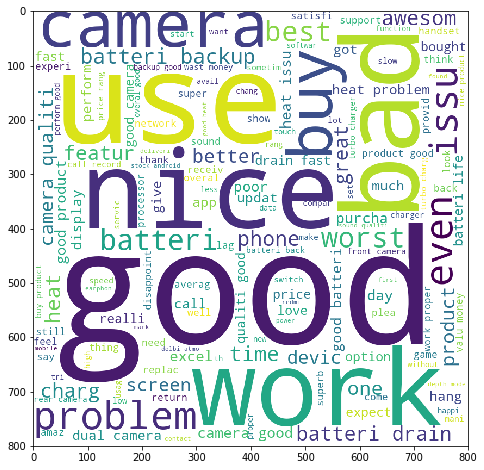

In [46]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

# Bar Graph on top 25 words

In [47]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [48]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

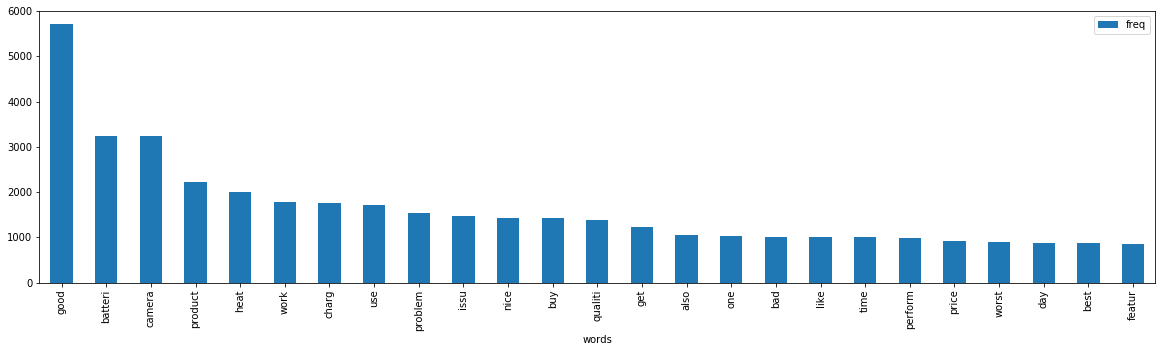

In [49]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

# Plot the bar graph for top 25 frequenctly used bigrams

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
# create a bigram count vectorizer object
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2))

In [52]:
X_bigram = bigram_count_vectorizer.fit_transform(reviews['clean_review'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

In [53]:
bigram_count_vectorizer.get_feature_names()[:20]

['00 00',
 '00 box',
 '00 hour',
 '00 realli',
 '00 silent',
 '00 usual',
 '000 000',
 '000 camera',
 '000 discount',
 '000 even',
 '000 miss',
 '000 phone',
 '000 price',
 '000 repair',
 '000 screen',
 '000000000 zero',
 '000mah batteri',
 '01 09',
 '01 2018',
 '01 got']

In [54]:
#DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5)) 

In the amazon case study dataset
Find the top 5 relavent reviews which has the below words

 - "battery drain"
 - "Good camera"
 
If there is a clash in the scores, review at index 0 has higher precedence than at index 1 and so on....

# Sentiment Classification

### Sentiment Prediction Strategy 1: Word based scoring 

In [55]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...


In [56]:
cd C:\Users\Administrator\Desktop\unstructure data class

C:\Users\Administrator\Desktop\unstructure data class


In [57]:
afinn = pd.read_csv("AFINN-111.txt", sep="\t", header=None)
afinn.columns = ['Term','Score']
term_scores = dict(afinn.values)

In [58]:
def get_sentiment(sent):
    tokens = word_tokenize(sent.lower())
    score = 0
    for term in tokens:
        score += term_scores.get(term,0)
    return score

In [59]:
reviews['sent_score'] = reviews.clean_review.apply(get_sentiment)

In [60]:
reviews.head()

,sentiment,review,clean_review,sent_score
0,1,Good but need updates and improvements,good need updat improv,3
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0
3,1,Good,good,3
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7


In [61]:
reviews['sent_prediction'] = \
reviews.sent_score.apply(lambda x:1 if x>0 else 0)

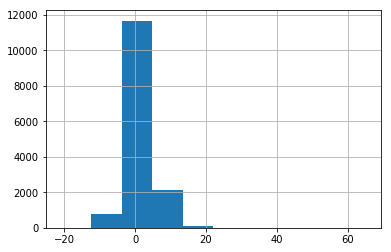

In [62]:
reviews.sent_score.hist()

In [63]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction
0,1,Good but need updates and improvements,good need updat improv,3,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0
3,1,Good,good,3,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0


In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(reviews.sentiment,reviews.sent_prediction)

0.7118228279386712

Tasks to try:
    1. Get the sentiment accuracy for the cleaned reviews which is not stemmed
    2. Affin dataset comprises of words which are bigrams and trigrams - like "not good", "no fun" etc. clean the data by considering terms
    3. Think of any other ways to increase the accuracy score

In [66]:
def clean_txt_new(sent):
    tokens = word_tokenize(sent.lower())
    token_new = [term for term in tokens \
               if term not in stop_updated and \
                term not in list(punctuation) and\
               len(term) > 2] 
    res = " ".join(token_new)
    return res

In [67]:
reviews['clean_review_unstemmed'] = reviews.review.apply(clean_txt_new)

In [68]:
reviews['sent_score_unstemmed'] = reviews.clean_review_unstemmed.apply(get_sentiment)

In [69]:
reviews['sent_prediction_unstemmed'] = \
reviews.sent_score_unstemmed.apply(lambda x:1 if x>0 else 0)

In [70]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_unstemmed)

0.7467802385008517

### Sentiment Prediction Strategy 2: Using popular package - Vader

In [71]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [72]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [73]:
reviews['score_vader'] = reviews.review.apply(get_vader_sentiment)

In [74]:
#Tweak the threshold to 0.3 to increase the accuracy
reviews['sent_prediction_vader'] = reviews.score_vader.\
apply(lambda x:1 if x>0.3 else 0)

In [75]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_vader)

0.7990459965928449

In [76]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_unstemmed,sent_score_unstemmed,sent_prediction_unstemmed,score_vader,sent_prediction_vader
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements,3,1,0.5994,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...,-8,0,-0.8720,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,get cash back already january..,0,0,0.0000,0
3,1,Good,good,3,1,good,3,1,0.4404,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,worst everthey changed last problem still retu...,-7,0,-0.8289,0


In [77]:
scor_ved = []
for i in reviews['score_vader']:
    if i>=-1 and i<-0.5:
        scor_ved.append('very Bad')
    elif i >= -0.5 and i <-0.2:
        scor_ved.append('bad')
    elif i>=-0.2 and i<0.2:
        scor_ved.append('netural')
    elif i>=0.2 and i<0.5:
        scor_ved.append('good')
    elif i>=0.5:
        scor_ved.append('very good')
        
## another way to code
#pd.cut(reviews['score_vader'],bins=[-1,-0.5,-0.2,0.2,0.5],labels=["very Bad",'bad','netural','good','very good'],right=False)

In [78]:
reviews['sentiment_label']=scor_ved

In [79]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_unstemmed,sent_score_unstemmed,sent_prediction_unstemmed,score_vader,sent_prediction_vader,sentiment_label
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements,3,1,0.5994,1,very good
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...,-8,0,-0.8720,0,very Bad
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,get cash back already january..,0,0,0.0000,0,netural
3,1,Good,good,3,1,good,3,1,0.4404,1,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,worst everthey changed last problem still retu...,-7,0,-0.8289,0,very Bad


In [145]:
count_vect = CountVectorizer(stop_words='english',max_features=5000)

In [156]:
X_reviews = count_vect.fit_transform(reviews.clean_review_unstemmed)
df = pd.DataFrame(X_reviews.toarray(), columns=count_vect.get_feature_names())
df.head()

,00,000,000mah,01,02,04,05,08,09,0a,...,yrs,yup,zenfone,zero,zone,zoom,zoomed,zooming,zuk,सल
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
cs = cosine_similarity(df)
ind = reviews.score_vader.sort_values().head(1).index[0]
ind

8075

In [158]:
### get the index of the review the least polarity score
pd.DataFrame(reviews.review.values[cs[ind].argsort()[::-1][1:6]])

,0
0,waste
1,Waste mobile phone
2,Paysa waste
3,Waste
4,Waste mobile


In [161]:
(cosine_similarity(df[1:2].flatten().argsort()[::-1]+1)[:5]

SyntaxError: unexpected EOF while parsing (<ipython-input-161-31de65c052df>, line 1)

####  for the seconf review of the Lenovo K8 get the top 5 similar Reviews
- to the cosine similarity function 
- arg 1 : second review
- arg 2 : reset all reviews
#### for the reviews eith the least popularity score get the top 5 similar reviews

In [81]:
from sklearn.metrics.pairwise import cosine_similarity

In [137]:
rev=(reviews['review'][1:])

In [133]:
#  X_reivew=pd.DataFrame(X.toarray(),columns=count_vect.get_feature_names())

In [138]:
# y_reivew=pd.DataFrame(y.toarray(),columns=count_vect.get_feature_names())
# y_reivew.head()

In [ ]:
sc = cosine_similarity(df_tfidf.t)

In [ ]:
def get_similar_words(input_words , sim_mat):
    cor_vals = sim_mat[input_words].sort_values(ascending=False)
    similar_words = cos_vals.drop(input_word).head(5)
    return similar_words

In [ ]:
sim_mat = cosine_similarity(df_tfidf.t)

sim_mat = pd.DataFrame(sim_mat,columns=df_tfidf.columns,index=df_tfidf.columns)

get_similar_words('drain',sim_mat)

### Sentiment Prediction Strategy 3: Building our own model

In [88]:
X = reviews.clean_review
y = reviews.sentiment

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = \
train_test_split(X,y,test_size=0.3,random_state=42)

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
count_vect = CountVectorizer()

In [92]:
X_train_bow = count_vect.fit_transform(X_train)

In [93]:
X_test_bow = count_vect.transform(X_test)

In [94]:
print(X_train_bow.shape,X_test_bow.shape)

(10272, 8521) (4403, 8521)


In [95]:
# Model building using logistic regression

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [97]:
logreg = LogisticRegression()

In [98]:
logreg.fit(X_train_bow,y_train)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
y_test_pred = logreg.predict(X_test_bow)

In [100]:
accuracy_score(y_test,y_test_pred)

0.8510106745400863

### Document clustering

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(max_features=150)

In [102]:
X = tfidfvectorizer.fit_transform(reviews['clean_review'])

In [103]:
from sklearn.cluster import KMeans

In [104]:
num_clusters = 6
km = KMeans(n_clusters=num_clusters, random_state=0)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [105]:
pred_cluster = km.predict(X)
reviews['cluster_predicted'] = pred_cluster
reviews['cluster_predicted'].value_counts()

0    8473
1    2380
2    1193
5    1107
3     932
4     590
Name: cluster_predicted, dtype: int64

In [106]:
pred_cluster.shape

(14675,)

In [107]:
km.cluster_centers_.shape

(6, 150)

in TFIDF or in DTM every word is a feature
when these words are clustered, the cluster center value for every feature tells us the centeroid of the word relavencies/frequencies.

Higher the cluster centeroid for that feature, higher will be value of word relevency/frequency.

In [108]:
print("Top 5 terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidfvectorizer.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i),
    for ind in order_centroids[i, : 5]:
        print (' %s' % terms[ind]),
    print

Top 5 terms per cluster:
Cluster 0:
 camera
 good
 heat
 work
 problem
Cluster 1:
 batteri
 good
 backup
 drain
 camera
Cluster 2:
 good
 camera
 one
 price
 perform
Cluster 3:
 nice
 product
 good
 camera
 one
Cluster 4:
 best
 price
 rang
 good
 camera
Cluster 5:
 product
 good
 buy
 worst
 excel


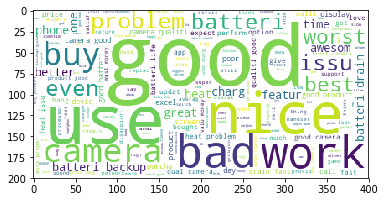

In [109]:
group = reviews[reviews['cluster_predicted'] == 1]
text = ' '.join(reviews['clean_review'])
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc)